In [1]:
import tensorflow

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
import cv2

import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_new_training_data(image_path,height,width):
    data=[]
    labels=[]
    classes=10
    
    for i in range(classes):
        img_path=os.path.join(image_path,str(i))
        j=0
        k=0
        m=0
        for img in os.listdir(img_path):
            im=cv2.imread(image_path+'/'+str(i)+'/'+img)
            im = cv2.resize(im, (width,height), interpolation = cv2.INTER_AREA)
            im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
            train_path = 'Train_GRAY/'+str(i)
            test_path='Test_GRAY/'+str(i)
            if j==k:
                cv2.imwrite(os.path.join(test_path ,str(m)+'.jpg'), im)
                k+=10
            else:
                cv2.imwrite(os.path.join(train_path ,str(m)+'.jpg'), im)
            j+=1
            m+=1

In [3]:
create_new_training_data('Dataset/train',120,160)

KeyboardInterrupt: 

In [24]:
#Without Removing Background

def create_dataframe(images_path):
    data=[]
    labels=[]
    classes=10
    for i in range(classes):
        img_path=os.path.join(images_path,str(i))
        for img in os.listdir(img_path):
            im=cv2.imread(images_path+'/'+str(i)+'/'+img)
            im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
            #im= remove_background(im)
            im = np.array(im)
            data.append(im)
            labels.append(i)
    data = np.array(data)
    labels = np.array(labels)
    return data,labels

In [25]:
data,labels=create_dataframe('Train_GRAY')

In [26]:
data.shape

(3600, 120, 160)

In [27]:
from numpy import save
save('data.npy', data)
save('labels.npy',labels)

In [28]:
test_data,test_labels=create_dataframe('Test_GRAY')

In [29]:
test_data.shape

(401, 120, 160)

In [30]:
test_labels.shape

(401,)

In [31]:
from numpy import save
save('test_data.npy',test_data)
save('test_labels.npy',test_labels)

In [34]:
from numpy import load
seg_data=load('data_segmentated.npy')

In [35]:
seg_data.shape

(3600, 120, 160)

In [48]:
test_data=load('test_segmentated.npy')
test_labels=load('test_labels_segmentated.npy')

In [49]:
m,_,n,_,=train_test_split(test_data,test_labels, test_size=0.001, random_state=42)

In [50]:
n

array([7, 0, 5, 2, 2, 9, 2, 5, 3, 0, 9, 1, 1, 3, 1, 6, 6, 5, 5, 1, 0, 9,
       8, 0, 9, 2, 8, 9, 2, 9, 4, 6, 1, 8, 2, 2, 9, 3, 3, 8, 1, 1, 0, 2,
       9, 3, 4, 0, 4, 1, 7, 8, 1, 9, 0, 5, 4, 0, 3, 3, 6, 7, 1, 2, 0, 6,
       5, 5, 1, 7, 3, 0, 1, 9, 6, 5, 9, 4, 6, 0, 0, 5, 8, 6, 1, 6, 7, 2,
       2, 5, 8, 2, 8, 4, 6, 9, 6, 6, 1, 6, 2, 0, 1, 3, 0, 0, 3, 8, 8, 3,
       5, 9, 9, 7, 1, 1, 7, 8, 9, 3, 2, 0, 6, 0, 4, 8, 9, 4, 6, 7, 3, 9,
       4, 2, 4, 8, 6, 5, 9, 0, 3, 7, 3, 5, 4, 1, 2, 4, 9, 0, 7, 9, 3, 0,
       4, 2, 2, 7, 8, 9, 5, 8, 4, 8, 2, 4, 4, 3, 5, 2, 1, 3, 2, 3, 7, 2,
       5, 1, 0, 0, 3, 3, 8, 4, 1, 7, 7, 5, 7, 4, 3, 3, 7, 2, 8, 5, 8, 5,
       7, 8, 4, 5, 7, 8, 7, 3, 0, 0, 6, 4, 5, 2, 4, 8, 6, 2, 9, 6, 9, 7,
       9, 4, 7, 3, 3, 4, 4, 9, 0, 5, 2, 9, 5, 0, 3, 7, 5, 9, 6, 7, 9, 3,
       1, 8, 0, 2, 8, 2, 6, 7, 3, 6, 4, 7, 1, 9, 1, 2, 6, 4, 3, 0, 0, 0,
       4, 3, 8, 8, 5, 2, 1, 5, 7, 7, 4, 1, 7, 5, 6, 8, 0, 6, 9, 2, 5, 8,
       5, 4, 2, 5, 1, 1, 0, 6, 4, 8, 0, 9, 5, 6, 7,

In [51]:
from numpy import save
save('test_segmentated',m)
save('test_labels_segmentated',n)

In [71]:
x=load('data_segmentated.npy')
y=load('labels_segmentated.npy')

In [72]:
x.shape

(3600, 120, 160)

In [73]:
y.shape

(3600,)

In [74]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [57]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.1, random_state = 27, stratify=y)

In [61]:
k=0
for i in range(len(train_x)):
    im=train_x[i]
    path = 'Train_Segmentated/'+str(train_y[i])
    cv2.imwrite(os.path.join(path ,str(k)+'.jpg'), im)
    k+=1

In [58]:
train_x[0]

array([[118, 118, 119, ..., 139, 138, 138],
       [118, 119, 120, ..., 139, 139, 138],
       [119, 120, 121, ..., 140, 139, 139],
       ...,
       [164, 165, 166, ...,  73,  73,  73],
       [164, 164, 165, ...,  73,  73,  73],
       [164, 164, 165, ...,  73,  73,  73]], dtype=uint8)

In [70]:
k=0
for i in range(len(val_x)):
    im=val_x[i]
    path = 'Test_Segmentated/'+str(val_y[i])
    cv2.imwrite(os.path.join(path ,str(k)+'.jpg'), im)
    k+=1

In [64]:
k

3240

In [65]:
train_x[0]

array([[118, 118, 119, ..., 139, 138, 138],
       [118, 119, 120, ..., 139, 139, 138],
       [119, 120, 121, ..., 140, 139, 139],
       ...,
       [164, 165, 166, ...,  73,  73,  73],
       [164, 164, 165, ...,  73,  73,  73],
       [164, 164, 165, ...,  73,  73,  73]], dtype=uint8)

In [34]:
img=cv2.imread('Dataset/train/0/1.jpg')

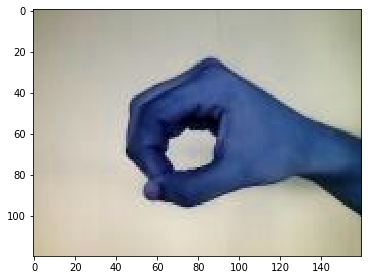

In [35]:
imshow(img)

In [39]:
i=np.array(img)
i.ndim

3

In [8]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

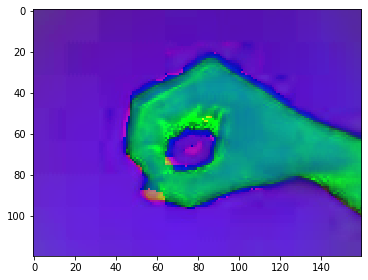

In [9]:
imshow(img_hsv)

In [10]:
from scipy import ndimage
sx = ndimage.sobel(img_hsv,axis=0,mode='constant')

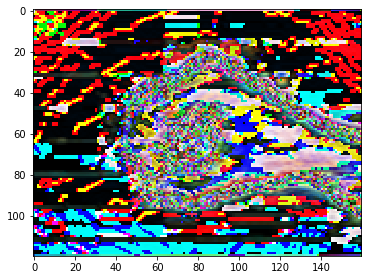

In [11]:
imshow(sx)

In [12]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [13]:
img=img/255

In [14]:
edges_prewitt_h = prewitt_v(img)

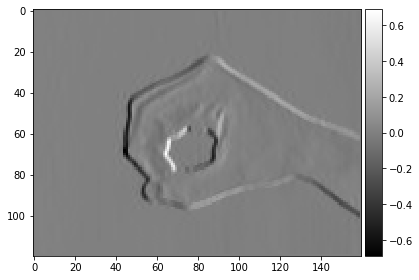

In [15]:
imshow(edges_prewitt_h,cmap='gray')

In [16]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)

In [18]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

NameError: name 'x' is not defined

In [21]:
img.shape

(120, 160)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


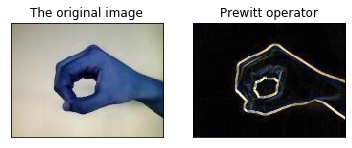

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image
rgb_img = img

# Grayscale processing image
grayImage =img

# Prewitt operator
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)

x = cv.filter2D(grayImage, cv.CV_16S, kernelx)
y = cv.filter2D(grayImage, cv.CV_16S, kernely)

# Turn uint8, image fusion
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
Prewitt = cv.addWeighted(absX, 0.5, absY, 0.5, 0)

# Used to display Chinese labels normally
plt.rcParams['font.sans-serif'] = ['SimHei']

# Display graphics
titles = ['The original image', 'Prewitt operator']
images = [rgb_img, Prewitt]

for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


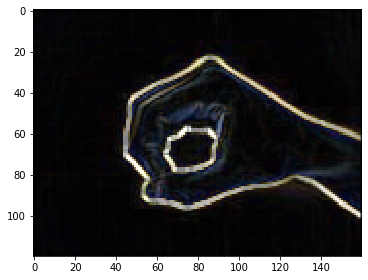

In [28]:
imshow(Prewitt)

In [30]:
Prewitt

array([[[0, 0, 0],
        [2, 2, 6],
        [3, 3, 6],
        ...,
        [4, 4, 4],
        [6, 6, 6],
        [0, 0, 0]],

       [[2, 2, 6],
        [5, 5, 9],
        [6, 6, 9],
        ...,
        [6, 6, 6],
        [7, 7, 7],
        [0, 0, 0]],

       [[3, 3, 6],
        [6, 6, 9],
        [6, 6, 8],
        ...,
        [8, 8, 8],
        [9, 9, 9],
        [2, 2, 2]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [4, 4, 4],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [3, 3, 3],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [3, 3, 3],
        [0, 0, 0]]], dtype=uint8)

In [115]:
from keras.datasets import cifar10

In [117]:
x_train_y_train,x_test,y_test=cifar10.load_data()

 50749440/170498071 [=======>......................] - ETA:  - ETA: 17:2 - ETA: 15:4 - ETA: 10:2 - ETA: 8:2 - ETA: 8: - ETA: 5: - ETA: 6: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - 

KeyboardInterrupt: 

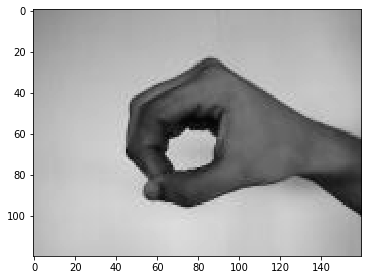

In [120]:
imshow(img)

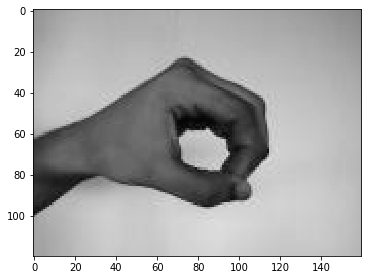

In [123]:
image = cv2.flip(img, 1)
imshow(image)

In [31]:
def remove_background(img):
    #img1 = rgb2gray(img)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = img
    #blur = cv2.GaussianBlur(img1,(3,3),0)
    #ret,thresh1 = cv2.threshold(img1,225,255,cv2.THRESH_BINARY_INV)
    thresh1 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,133,5)
    
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    b,g,r = cv2.split(img2)
    for i in range(closing.shape[0]):
      for j in range(closing.shape[1]):
        if(closing[i,j])==0:
          b[i,j] = 0
          g[i,j] = 0
          r[i,j] = 0

    newimg = cv2.merge((b,g,r))
    newimg=cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)
    return newimg

In [94]:
word_dict = {0:'Zero',1:'One',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}
import numpy as np
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

model = keras.models.load_model("Model_final.h5")

background = None
accumulated_weight = 0.5

ROI_top = 0
ROI_bottom = 250
ROI_right =0
ROI_left =300
def inp(i):
    i=np.array(i)
    i=i[...,np.newaxis]
    l=[]
    l.append(i)
    l=np.array(l)
    return l

def remove_background(img):
    #img1 = rgb2gray(img)
    x=np.array(img)
    if x.ndim==3:
        img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img1=img
    img2 = img
    #blur = cv2.GaussianBlur(img1,(3,3),0)
    #ret,thresh1 = cv2.threshold(img1,225,255,cv2.THRESH_BINARY_INV)
    thresh1 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,133,5)
    
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    b,g,r = cv2.split(img2)
    for i in range(closing.shape[0]):
      for j in range(closing.shape[1]):
        if(closing[i,j])==0:
          b[i,j] = 0
          g[i,j] = 0
          r[i,j] = 0

    newimg = cv2.merge((b,g,r))
    newimg=cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)
    return newimg



cam = cv2.VideoCapture(0)
num_frames =0
while True:
    ret, frame = cam.read()

    # filpping the frame to prevent inverted image of captured frame...
    frame = cv2.flip(frame, 1)
    frame_copy = frame.copy()

    # ROI from the frame
    roi = frame[ROI_top:ROI_bottom, ROI_right:ROI_left]

    #gray_frame = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray_frame=roi
    #gray_frame = cv2.GaussianBlur(gray_frame, (9, 9), 0)
    
    gray_frame=remove_background(gray_frame)
    

    
            
    #cv2.drawContours(frame_copy, [(ROI_right, ROI_top)], -1, (255, 0, 0),1)
    cv2.imshow("Thesholded Hand Image", gray_frame)
            
    thresholded = cv2.resize(gray_frame, (160, 120))
    thresholded=thresholded/255
    x=inp(thresholded)
    #thresholded = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB)
    #thresholded = np.reshape(thresholded, (1,thresholded.shape[0],thresholded.shape[1],3))
            
    pred = model.predict(x)
    cv2.putText(frame_copy, word_dict[np.argmax(pred)], (170, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            
            
    # Draw ROI on frame_copy
    cv2.rectangle(frame_copy, (ROI_left, ROI_top), (ROI_right, ROI_bottom), (255,128,0), 3)

    # incrementing the number of frames for tracking
    num_frames += 1

    # Display the frame with segmented hand
    #cv2.putText(frame_copy, "DataFlair hand sign recognition_ _ _", (10, 20), cv2.FONT_ITALIC, 0.5, (51,255,51), 1)
    cv2.imshow("Sign Languag Digit Detection", frame_copy)


    # Close windows with Esc
    k = cv2.waitKey(1) & 0xFF

    if k == 27:
        break

# Release the camera and destroy all the windows
cam.release()
cv2.destroyAllWindows()

In [56]:
cam.release()
cv2.destroyAllWindows()

In [81]:
x=cv2.imread('Train_segmentated/0/33.jpg')
x=cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

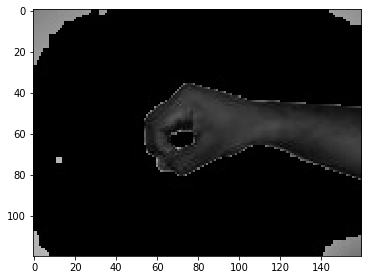

In [82]:
imshow(x)

In [83]:
x=x/255

In [84]:
x

array([[0.50980392, 0.50980392, 0.51372549, ..., 0.56862745, 0.56862745,
        0.57254902],
       [0.50980392, 0.51372549, 0.51764706, ..., 0.58039216, 0.56470588,
        0.56470588],
       [0.51372549, 0.51764706, 0.52156863, ..., 0.58039216, 0.56862745,
        0.57647059],
       ...,
       [0.68235294, 0.72156863, 0.68627451, ..., 0.48235294, 0.47843137,
        0.47058824],
       [0.69803922, 0.68627451, 0.70588235, ..., 0.4745098 , 0.47058824,
        0.4627451 ],
       [0.68627451, 0.68627451, 0.69019608, ..., 0.47058824, 0.46666667,
        0.45882353]])

In [85]:
def inp(i):
    i=np.array(i)
    i=i[...,np.newaxis]
    l=[]
    l.append(i)
    l=np.array(l)
    return l
x=inp(x)


In [86]:
x.shape

(1, 120, 160, 1)

In [87]:
y=model.predict(x)

In [88]:
y

array([[1.0000000e+00, 2.2875476e-15, 1.9676696e-14, 1.2968235e-12,
        2.5751387e-12, 2.9925265e-13, 3.6899080e-18, 1.1675196e-13,
        3.4053687e-15, 1.5387212e-12]], dtype=float32)

In [89]:
y=np.argmax(y)

In [90]:
y

0